In [1]:
import requests
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


print("All libraries imported successfully!")


All libraries imported successfully!


# Load the Heart Disease Dataset

In [33]:
# "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"  


def extract_heart_disease_data(url, filename="heart_disease.zip", extract_to="heart_disease_data", csv_filename="heart_disease.csv"):
    """
    A function for downloading, extracting, and loading the Heart Disease dataset.
    
    Arguments:
    url          -- the URL where the dataset is hosted
    filename     -- the local filename to save the zip file
    extract_to   -- the directory where the data will be extracted
    
    Returns:
    df           -- a pandas DataFrame with the loaded data
    """
    
   
    # # Create full extraction path: ./data/heart_disease_data
    # extract_path = os.path.join(data_dir, extract_to)
    data_dir = os.path.join("..", "data")
    os.makedirs(data_dir, exist_ok=True)
    csv_path = os.path.join(data_dir, csv_filename)
    
    
    # Step 1: Download the dataset
    print("Downloading Heart Disease dataset...")
    r = requests.get(url, stream=True)
    zip_path = os.path.join(data_dir, filename)
   
    with open(filename, "wb") as f:
        f.write(r.content)
        
    print(f"Dataset downloaded and saved as '{filename}'")

    # Step 2: Extract the ZIP
    print(f"Extracting to {extract_to}...")
    # os.makedirs(extract_path, exist_ok=True)
    with zipfile.ZipFile(filename, "r") as zip_ref:
        # zip_ref.extractall(extract_path)
        zip_ref.extractall(extract_to)
    print("Extraction complete.")

    # Step 3: Load the data
    data_path = os.path.join(extract_to, "processed.cleveland.data")
    columns = [
        'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
    ]
    
    df = pd.read_csv(data_path, names=columns, na_values='?')
    print("Data loaded into DataFrame.")

    df.to_csv(csv_path, index=False)
    print(f"Data saved as CSV: {csv_path}")
    
    return df

# Call the function
df = extract_heart_disease_data("https://archive.ics.uci.edu/static/public/45/heart+disease.zip")

Dataset downloaded and saved as 'heart_disease.zip'
Extracting to heart_disease_data...
Extraction complete.
Data loaded into DataFrame.
Data saved as CSV: ..\data\heart_disease.csv


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


#### Only 14 attributes used:
      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. #58 (num)       (the predicted attribute)

      

#### Complete attribute documentation:
     
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
     
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    
     12 chol: serum cholestoral in mg/dl
    
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
    
     19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
     
     32 thalach: maximum heart rate achieved
    
     37 trestbpd: resting blood pressure
     38 exang: exercise induced angina (1 = yes; 0 = no)
     
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
    
     44 ca: number of major vessels (0-3) colored by flourosopy
   
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
   
     
     


# Handling Missing Values

In [6]:
missing_values= df.isnull().sum() 
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [7]:
df[df[["ca","thal"]].isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
count= df["target"].value_counts(dropna=False)
count

target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [11]:
heart_df= df.copy()

In [12]:

for col in heart_df.columns:

    if heart_df[col].isnull().sum() > 0:
        print(f"Handling missing values in {col}...")
        
        mode_val = heart_df[col].mode()[0]
        heart_df[col].fillna(mode_val, inplace=True)

print("Data cleaning completed!")

Handling missing values in ca...
Handling missing values in thal...
Data cleaning completed!


In [13]:
print("Mode of 'ca':", heart_df['ca'].mode()[0])
print("Mode of 'thal':", heart_df['thal'].mode()[0])

Mode of 'ca': 0.0
Mode of 'thal': 3.0


In [14]:
heart_df['ca'] = heart_df['ca'].astype(int)
heart_df['thal'] = heart_df['thal'].astype(int)

In [15]:
int_col= ['age', 'trestbps']
heart_df[int_col]= heart_df[int_col].astype("int32")

float_col=['oldpeak','chol','thalach']
heart_df[float_col]= heart_df[float_col].astype("float32")

nominal_cat=["sex","fbs","thal","exang"]
heart_df[nominal_cat]= heart_df[nominal_cat].astype("category")

ordinal_cat= ["cp", "slope", "ca","restecg"]
heart_df[ordinal_cat]= heart_df[ordinal_cat].astype("category")




heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int32   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int32   
 4   chol      303 non-null    float32 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float32 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float32 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    int64   
dtypes: category(8), float32(3), int32(2), int64(1)
memory usage: 11.9 KB


In [16]:
heart_df['cp'] = heart_df['cp'].cat.reorder_categories(
    new_categories=[1, 2, 3, 4], 
    ordered=True
)

heart_df['slope'] = heart_df['slope'].cat.reorder_categories(
    new_categories=[1, 2, 3], 
    ordered=True
)

heart_df['ca'] = heart_df['ca'].cat.reorder_categories(
    new_categories=[0, 1, 2, 3], 
    ordered=True
)



heart_df['restecg'] = heart_df['restecg'].cat.reorder_categories(
    new_categories=[0, 1, 2], 
    ordered=True
)



In [17]:
heart_df['cp'].cat.ordered  

True

In [18]:
target_counts = heart_df['target'].value_counts().sort_index()
print("Original target classes:\n")
print(target_counts)
print(target_counts.index)
print("\n")
# Create interpretable labels
target_labels = {
    0: 'No Disease',
    1: 'Mild Disease', 
    2: 'Moderate Disease',
    3: 'Severe Disease',
    4: 'Very Severe Disease'
}

print("\nTarget meaning:")
for key, value in target_labels.items():
    if key in target_counts.index:
        count = target_counts[key]
        percentage = count/len(heart_df)*100
        print(f"  {key}: {value} - {count} samples ({percentage:.1f}%)")



# Create binary target (most common approach)
heart_df['target_binary'] = (heart_df['target'] > 0).astype(int)
heart_df['target_binary_label'] = heart_df['target_binary'].map({0: 'No Disease', 1: 'Heart Disease'})



binary_counts = heart_df['target_binary'].value_counts()
print(f"\nNo Disease (0): {binary_counts[0]} samples ({binary_counts[0]/len(heart_df)*100:.1f}%)\n")
print(f"Heart Disease (1): {binary_counts[1]} samples ({binary_counts[1]/len(heart_df)*100:.1f}%)")



Original target classes:

target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64
Index([0, 1, 2, 3, 4], dtype='int64', name='target')



Target meaning:
  0: No Disease - 164 samples (54.1%)
  1: Mild Disease - 55 samples (18.2%)
  2: Moderate Disease - 36 samples (11.9%)
  3: Severe Disease - 35 samples (11.6%)
  4: Very Severe Disease - 13 samples (4.3%)

No Disease (0): 164 samples (54.1%)

Heart Disease (1): 139 samples (45.9%)


In [19]:
heart_df['target_binary'] = heart_df['target_binary'].astype('category')
heart_df['target'] = heart_df['target'].astype('int8')  

# Check data types
heart_df[['target', 'target_binary', 'target_binary_label']].dtypes

target                     int8
target_binary          category
target_binary_label      object
dtype: object

In [20]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  303 non-null    int32   
 1   sex                  303 non-null    category
 2   cp                   303 non-null    category
 3   trestbps             303 non-null    int32   
 4   chol                 303 non-null    float32 
 5   fbs                  303 non-null    category
 6   restecg              303 non-null    category
 7   thalach              303 non-null    float32 
 8   exang                303 non-null    category
 9   oldpeak              303 non-null    float32 
 10  slope                303 non-null    category
 11  ca                   303 non-null    category
 12  thal                 303 non-null    category
 13  target               303 non-null    int8    
 14  target_binary        303 non-null    category
 15  target_binary_label  30

# Visualization

In [21]:
# Create a readable version of thal
heart_df['thal_label'] = heart_df['thal'].map({
    3: 'unknown',
    6: 'fixed_defect',
    7: 'reversible_defect'
})



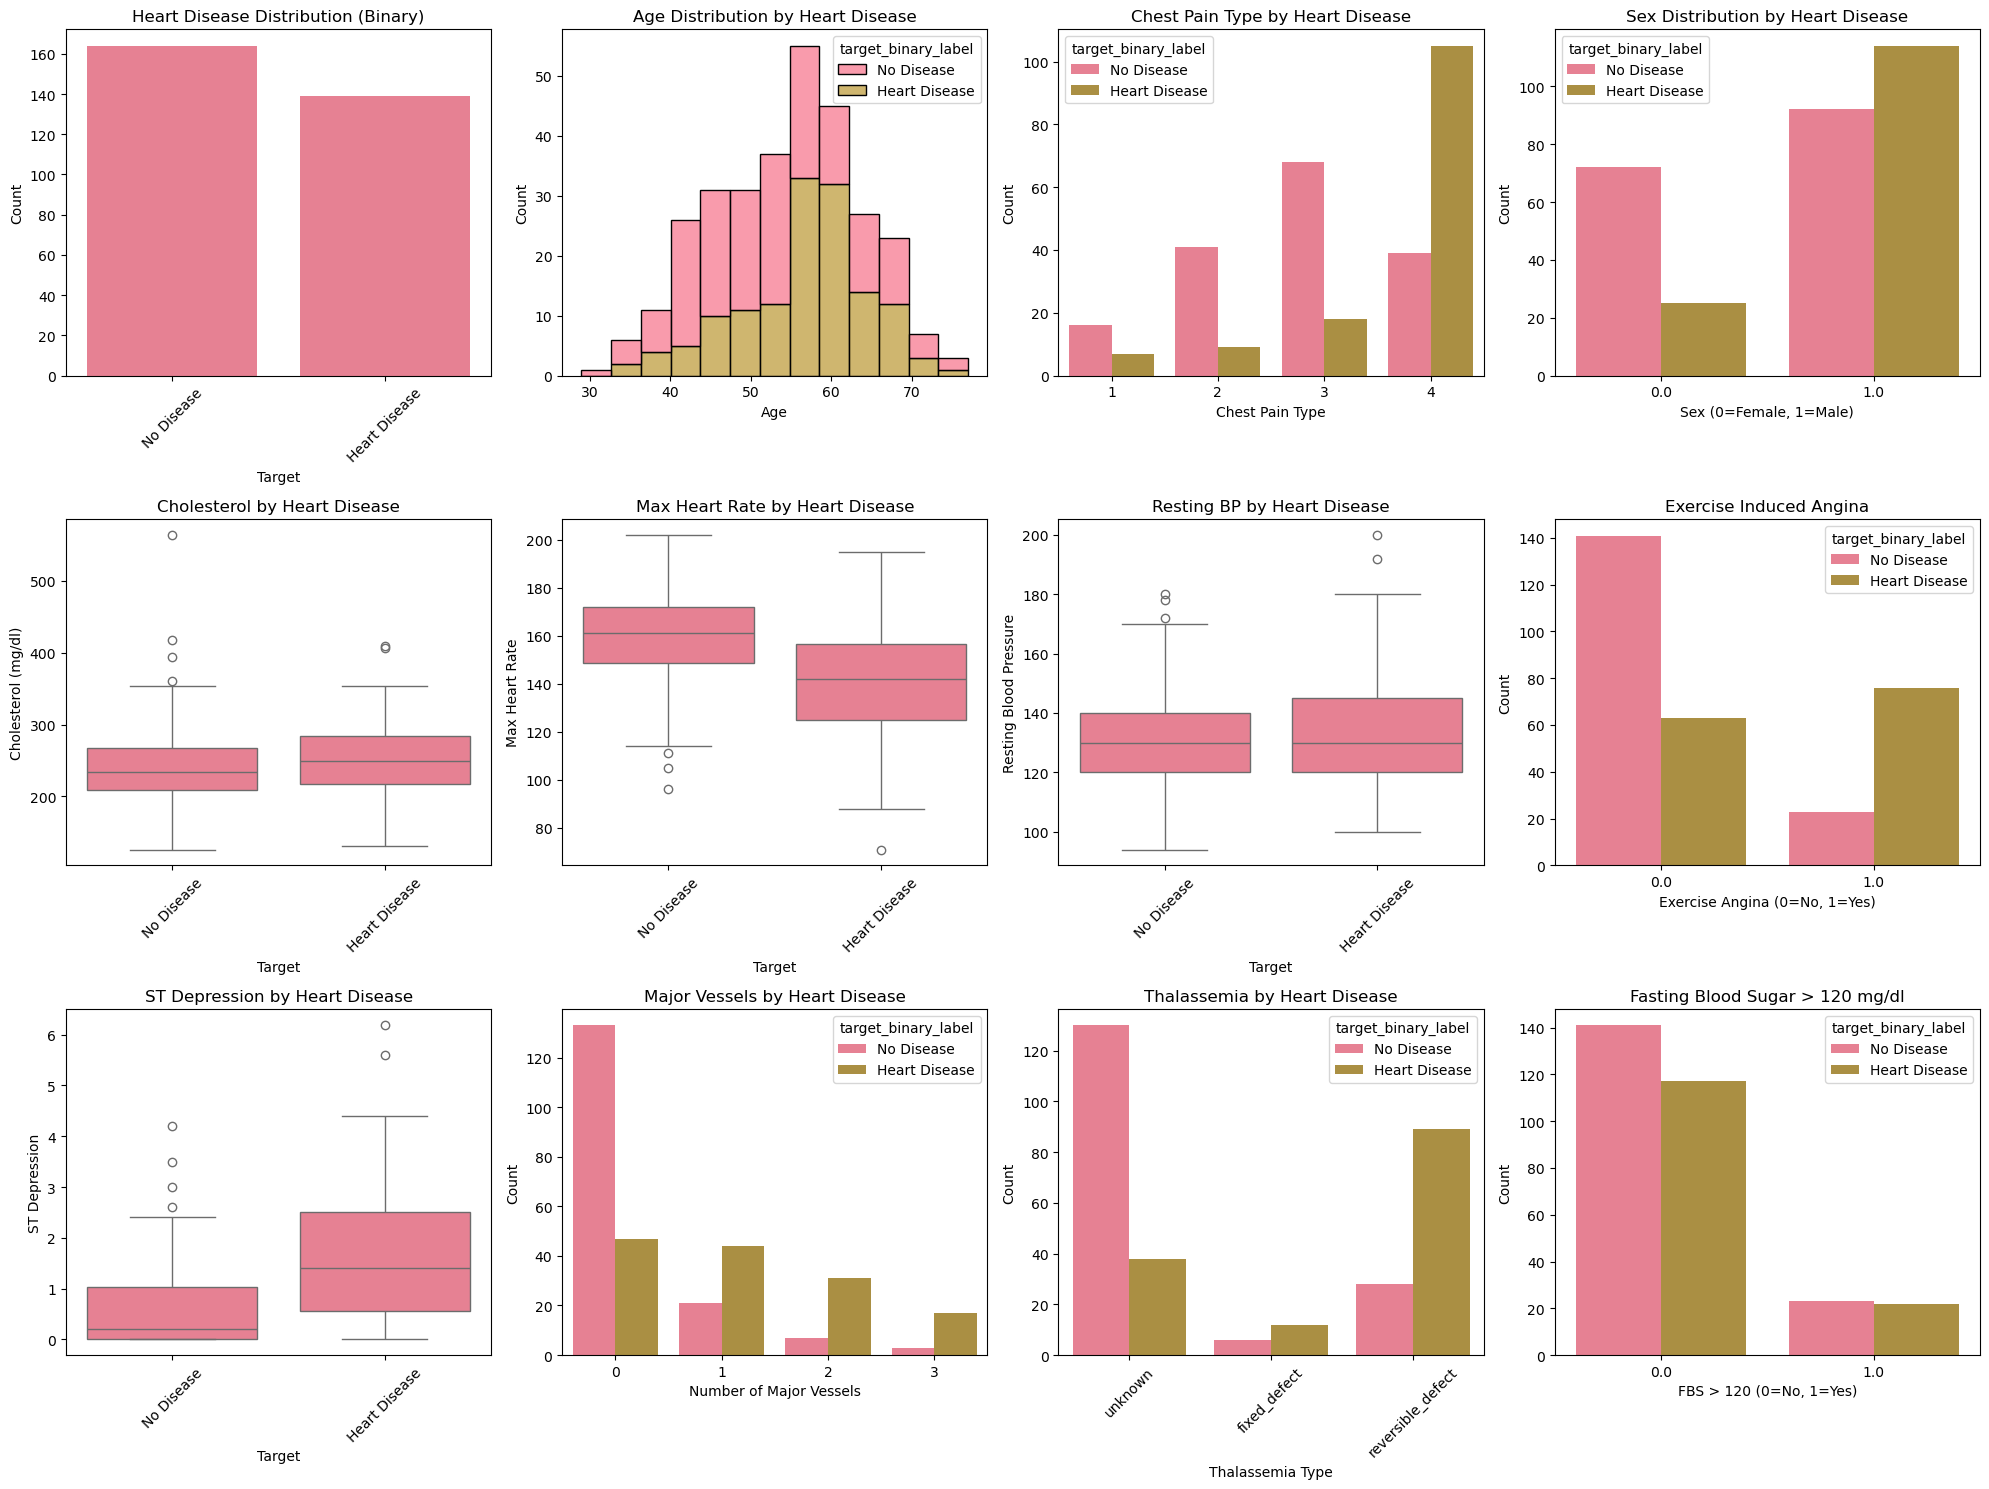

In [22]:


# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create figure with subplots for EDA
fig = plt.figure(figsize=(20, 15))

# 1. Target distribution
plt.subplot(3, 4, 1)
sns.countplot(data=heart_df, x='target_binary_label')
plt.title('Heart Disease Distribution (Binary)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 2. Age distribution by target
plt.subplot(3, 4, 2)
sns.histplot(data=heart_df, x='age', hue='target_binary_label', multiple='stack', alpha=0.7)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')

# 3. Chest pain type by target
plt.subplot(3, 4, 3)
sns.countplot(data=heart_df, x='cp', hue='target_binary_label')
plt.title('Chest Pain Type by Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

# 4. Sex distribution by target
plt.subplot(3, 4, 4)
sns.countplot(data=heart_df, x='sex', hue='target_binary_label')
plt.title('Sex Distribution by Heart Disease')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Count')

# 5. Cholesterol distribution
plt.subplot(3, 4, 5)
sns.boxplot(data=heart_df, x='target_binary_label', y='chol')
plt.title('Cholesterol by Heart Disease')
plt.xlabel('Target')
plt.ylabel('Cholesterol (mg/dl)')
plt.xticks(rotation=45)

# 6. Maximum heart rate
plt.subplot(3, 4, 6)
sns.boxplot(data=heart_df, x='target_binary_label', y='thalach')
plt.title('Max Heart Rate by Heart Disease')
plt.xlabel('Target')
plt.ylabel('Max Heart Rate')
plt.xticks(rotation=45)

# 7. Resting blood pressure
plt.subplot(3, 4, 7)
sns.boxplot(data=heart_df, x='target_binary_label', y='trestbps')
plt.title('Resting BP by Heart Disease')
plt.xlabel('Target')
plt.ylabel('Resting Blood Pressure')
plt.xticks(rotation=45)

# 8. Exercise induced angina
plt.subplot(3, 4, 8)
sns.countplot(data=heart_df, x='exang', hue='target_binary_label')
plt.title('Exercise Induced Angina')
plt.xlabel('Exercise Angina (0=No, 1=Yes)')
plt.ylabel('Count')

# 9. ST depression (oldpeak)
plt.subplot(3, 4, 9)
sns.boxplot(data=heart_df, x='target_binary_label', y='oldpeak')
plt.title('ST Depression by Heart Disease')
plt.xlabel('Target')
plt.ylabel('ST Depression')
plt.xticks(rotation=45)

# 10. Number of major vessels
plt.subplot(3, 4, 10)
sns.countplot(data=heart_df, x='ca', hue='target_binary_label')
plt.title('Major Vessels by Heart Disease')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Count')

# 11. Thalassemia
plt.subplot(3, 4, 11)
sns.countplot(data=heart_df, x='thal_label', hue='target_binary_label')
plt.title('Thalassemia by Heart Disease')
plt.xlabel('Thalassemia Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 12. Fasting blood sugar
plt.subplot(3, 4, 12)
sns.countplot(data=heart_df, x='fbs', hue='target_binary_label')
plt.title('Fasting Blood Sugar > 120 mg/dl')
plt.xlabel('FBS > 120 (0=No, 1=Yes)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


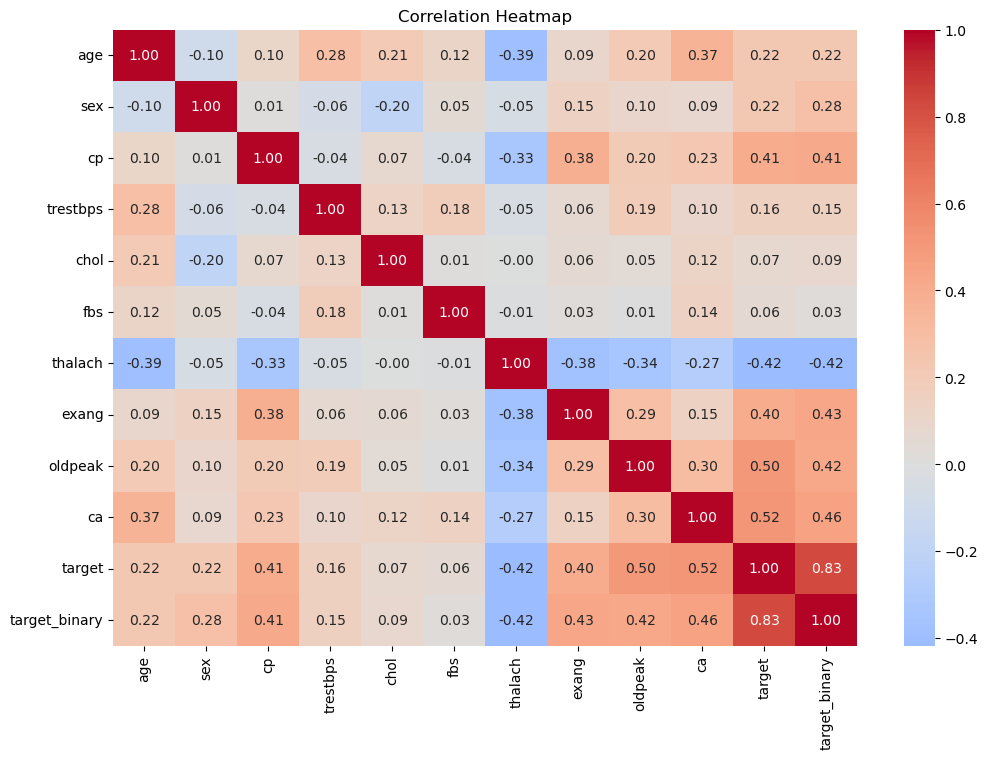

In [23]:
# Create a clean numerical version for correlation
corr_df = heart_df.copy()

# Map categoricals to 0/1 
corr_df['sex'] = corr_df['sex'].astype(int)
corr_df['fbs'] = corr_df['fbs'].astype(int)
corr_df['exang'] = corr_df['exang'].astype(int)
corr_df['ca'] = corr_df['ca'].astype(int)
corr_df['cp'] = corr_df['cp'].astype(int)
corr_df['target_binary'] = corr_df['target_binary'].astype(int)

# Now compute correlation with target_binary
corr_matrix = corr_df.select_dtypes(include=[np.number]).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
# Features most correlated with target
print("\nFeatures most correlated with heart disease:\n")
# target_corr = corr_matrix['target'].abs().sort_values(ascending=False)
target_corr = corr_matrix['target_binary'].abs().sort_values(ascending=False)


print(target_corr[2:])  


Features most correlated with heart disease:

ca          0.460033
exang       0.431894
oldpeak     0.424510
thalach     0.417167
cp          0.414446
sex         0.276816
age         0.223120
trestbps    0.150825
chol        0.085164
fbs         0.025264
Name: target_binary, dtype: float64


In [25]:
# One-hot encode thal
heart_df = pd.get_dummies(heart_df, columns=['thal_label'], prefix='thal')

In [26]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_binary,target_binary_label,thal_unknown,thal_fixed_defect,thal_reversible_defect
0,63,1.0,1,145,233.0,1.0,2,150.0,0.0,2.3,3,0,6,0,0,No Disease,False,True,False
1,67,1.0,4,160,286.0,0.0,2,108.0,1.0,1.5,2,3,3,2,1,Heart Disease,True,False,False
2,67,1.0,4,120,229.0,0.0,2,129.0,1.0,2.6,2,2,7,1,1,Heart Disease,False,False,True
3,37,1.0,3,130,250.0,0.0,0,187.0,0.0,3.5,3,0,3,0,0,No Disease,True,False,False
4,41,0.0,2,130,204.0,0.0,2,172.0,0.0,1.4,1,0,3,0,0,No Disease,True,False,False


# Feature Selection and Data Splitting

In [27]:
features= heart_df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
                    'thal_unknown', 'thal_fixed_defect', 'thal_reversible_defect']]

features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal_unknown,thal_fixed_defect,thal_reversible_defect
0,63,1.0,1,145,233.0,1.0,2,150.0,0.0,2.3,3,0,False,True,False
1,67,1.0,4,160,286.0,0.0,2,108.0,1.0,1.5,2,3,True,False,False
2,67,1.0,4,120,229.0,0.0,2,129.0,1.0,2.6,2,2,False,False,True
3,37,1.0,3,130,250.0,0.0,0,187.0,0.0,3.5,3,0,True,False,False
4,41,0.0,2,130,204.0,0.0,2,172.0,0.0,1.4,1,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1.0,1,110,264.0,0.0,0,132.0,0.0,1.2,2,0,False,False,True
299,68,1.0,4,144,193.0,1.0,0,141.0,0.0,3.4,2,2,False,False,True
300,57,1.0,4,130,131.0,0.0,0,115.0,1.0,1.2,2,1,False,False,True
301,57,0.0,2,130,236.0,0.0,2,174.0,0.0,0.0,2,1,True,False,False


In [28]:
target= heart_df['target_binary']

target[:5]

0    0
1    1
2    1
3    0
4    0
Name: target_binary, dtype: category
Categories (2, int64): [0, 1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)


scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [30]:
# Show before and after scaling
print("\nBefore scaling (first 5 rows):")
print(features[numerical_cols].head())

print("\nAfter scaling (first 5 rows):")
print(X_train_scaled[numerical_cols].head())


Before scaling (first 5 rows):
   age  trestbps   chol  thalach  oldpeak
0   63       145  233.0    150.0      2.3
1   67       160  286.0    108.0      1.5
2   67       120  229.0    129.0      2.6
3   37       130  250.0    187.0      3.5
4   41       130  204.0    172.0      1.4

After scaling (first 5 rows):
          age  trestbps      chol   thalach   oldpeak
132 -2.838504 -0.125982 -0.864142  2.314470 -0.873573
202  0.241352  0.974653 -2.483637  1.021242 -0.704854
196  1.561291  1.524970 -0.241260 -0.851710 -0.789214
75   1.121311  1.524970  2.374848  0.040172 -0.198698
176 -0.308622 -1.336680 -0.262023 -0.138205 -0.789214


In [34]:
output_dir = "../heart_disease_data/split_data"
os.makedirs(output_dir, exist_ok=True)

# Save X_train_scaled
X_train_scaled.to_csv(os.path.join(output_dir, "X_train_scaled.csv"), index=False)

# Save X_test_scaled
X_test_scaled.to_csv(os.path.join(output_dir, "X_test_scaled.csv"), index=False)

# Save y_train 
y_train_df = pd.DataFrame(y_train, columns=['target_binary']) 
y_train_df.to_csv(os.path.join(output_dir, "y_train.csv"), index=False)

# Save y_test
y_test_df = pd.DataFrame(y_test, columns=['target_binary'])
y_test_df.to_csv(os.path.join(output_dir, "y_test.csv"), index=False)

print(f"All four files saved to '{output_dir}'")

All four files saved to '../heart_disease_data/split_data'
